#Proyecto Clasificador de imagenes 
##By: Walter Simba


Importamos Librerías

In [1]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import keras


In [3]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import  Sequential,Input,Model

In [8]:
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.keras.layers import Dense, Dropout, Flatten #Para la red neuronal
from tensorflow.keras.layers import Conv2D, MaxPooling2D #para implementar las capas convolucionales
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import SGD


Verificación de versiones instaladas 



In [7]:
import scipy
print('scipy: %s' % scipy.__version__)
# numpy
import numpy
print('numpy: %s' % numpy.__version__)
# matplotlib
import matplotlib
print('matplotlib: %s' % matplotlib.__version__)
# pandas
import pandas
print('pandas: %s' % pandas.__version__)
# statsmodels
import statsmodels
print('statsmodels: %s' % statsmodels.__version__)
# scikit-learn
import sklearn
print('sklearn: %s' % sklearn.__version__)
# tensorflow
import tensorflow
print('tensorflow: %s' % tensorflow.__version__)
# keras
import keras
print('keras: %s' % keras.__version__)
# cv2
import cv2
print('cv2: %s' % cv2.__version__)
# re
import re
print('re: %s' % re.__version__)


scipy: 1.7.3
numpy: 1.21.6
matplotlib: 3.2.2
pandas: 1.3.5
statsmodels: 0.12.2
sklearn: 1.0.2
tensorflow: 2.8.2
keras: 2.8.0
cv2: 4.6.0
re: 2.2.1


Carga de imagenes locales

In [18]:
dirname = os.path.join(os.getcwd(), 'Dataset/train')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  /content/drive/MyDrive/Master UIDE/Dataset/train/
/content/drive/MyDrive/Master UIDE/Dataset/train/CLASS_02 1
/content/drive/MyDrive/Master UIDE/Dataset/train/CLASS_04 62
/content/drive/MyDrive/Master UIDE/Dataset/train/CLASS_08 105
/content/drive/MyDrive/Master UIDE/Dataset/train/CLASS_03 63
/content/drive/MyDrive/Master UIDE/Dataset/train/CLASS_07 213
/content/drive/MyDrive/Master UIDE/Dataset/train/CLASS_05 204
/content/drive/MyDrive/Master UIDE/Dataset/train/CLASS_06 949
Directorios leidos: 7
Imagenes en cada directorio [63, 105, 63, 213, 204, 949, 36]
suma Total de imagenes en subdirs: 1633


Creación de etiquetas

In [19]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

Cantidad etiquetas creadas:  1633


In [21]:
categorias=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    deportes.append(name[len(name)-1])
    indice=indice+1

0 CLASS_02
1 CLASS_04
2 CLASS_08
3 CLASS_03
4 CLASS_07
5 CLASS_05
6 CLASS_06


In [22]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy

# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  7
Output classes :  [0 1 2 3 4 5 6]


Creación de Sets de Entrenamiento y Test

In [23]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (1306, 216, 384, 3) (1306,)
Testing data shape :  (327, 216, 384, 3) (327,)


Text(0.5, 1.0, 'Ground Truth : 5')

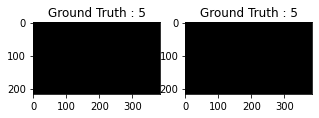

In [24]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

Preprocesamos las imagenes

In [25]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [26]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 5
After conversion to one-hot: [0. 0. 0. 0. 0. 1. 0.]


In [27]:
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [28]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(1044, 216, 384, 3) (262, 216, 384, 3) (1044, 7) (262, 7)


Creamos el modelo de CNN

In [49]:
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 6 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria
sport_model = Sequential()
sport_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(21,28,3)))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(MaxPooling2D((2, 2),padding='same'))
sport_model.add(Dropout(0.5))

sport_model.add(Flatten())
sport_model.add(Dense(32, activation='linear'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(Dropout(0.5))
sport_model.add(Dense(nClasses, activation='softmax'))

sport_model.summary()
#sgd = SGD(learning_rate=0.1)
sport_model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,optimizer=tensorflow.keras.optimizers.Adagrad(learning_rate=INIT_LR, decay=INIT_LR / 100) ,metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 21, 28, 32)        896       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 21, 28, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 11, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 11, 14, 32)        0         
                                                                 
 flatten_4 (Flatten)         (None, 4928)              0         
                                                                 
 dense_8 (Dense)             (None, 32)                157728    
                                                      

In [ ]:
sport_model.summary()

In [ ]:
sport_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adagrad(lr=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])


In [56]:
sport_model.save("/sports_mnist.h5py")

In [ ]:
sport_train = sport_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

In [ ]:
test_eval = sport_model.evaluate(test_X, test_Y_one_hot, verbose=1)


In [ ]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

In [ ]:
accuracy = sport_train.history['acc']
val_accuracy = sport_train.history['val_acc']
loss = sport_train.history['loss']
val_loss = sport_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
predicted_classes2 = sport_model.predict(test_X)

In [ ]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [ ]:
predicted_classes.shape, test_Y.shape